In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('whickham.csv')
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [22]:
# Getting proportions of categorical features
pd.DataFrame(data.outcome.value_counts(normalize = True))

,outcome
Alive,0.719178
Dead,0.280822


In [23]:
bysmoker = pd.DataFrame(data.groupby('smoker').outcome.value_counts(normalize = True))
bysmoker.head()

outcome
smoker outcome          
No     Alive    0.685792
       Dead     0.314208
Yes    Alive    0.761168
       Dead     0.238832

In [24]:
# Above codes create a multi index (below) using both filters
bysmoker.index

MultiIndex([( 'No', 'Alive'),
            ( 'No',  'Dead'),
            ('Yes', 'Alive'),
            ('Yes',  'Dead')],
           names=['smoker', 'outcome'])

In [25]:
# Unstacking remove the multi index and resassign it to the first filter
bysmoker = bysmoker.unstack()
bysmoker.head()

outcome          
outcome     Alive      Dead
smoker                     
No       0.685792  0.314208
Yes      0.761168  0.238832

In [8]:
bysmoker.index

Index(['No', 'Yes'], dtype='object', name='smoker')

In [26]:
# Aggregate categorical values by creating a new column
data['agegroup'] = pd.cut(data.age, [0,30,40,53,64], 
                              labels = ['0-30','30-40', '40-53', '53-64'])
data.head()

,outcome,smoker,age,agegroup
0,Alive,Yes,23,0-30
1,Alive,Yes,18,0-30
2,Dead,Yes,71,NaN
3,Alive,No,67,NaN
4,Alive,No,64,53-64


In [32]:
byage = data.groupby(['agegroup', 'smoker']).outcome.value_counts(normalize = True)
byage.head()

agegroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
Name: outcome, dtype: float64

In [31]:
byage = byage.unstack().drop('Dead', axis = 1)
byage.head()

outcome      Alive          
smoker          No       Yes
agegroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

Text(0.5, 1.0, 'smoker')

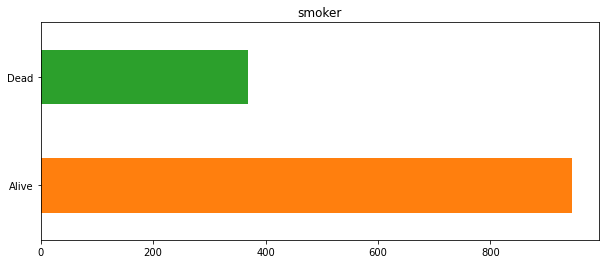

In [42]:
plt.figure(figsize = (10,4))
data.outcome.value_counts().plot(kind = 'barh', color = ['C1', 'C2']); plt.title('smoker')


Text(0.5, 1.0, 'smoker')

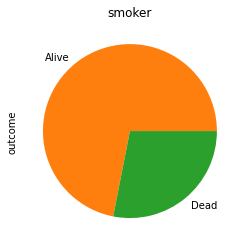

In [43]:
data.outcome.value_counts().plot(kind = 'pie', colors = ['C1', 'C2']); plt.title('smoker')

<AxesSubplot:xlabel='smoker'>

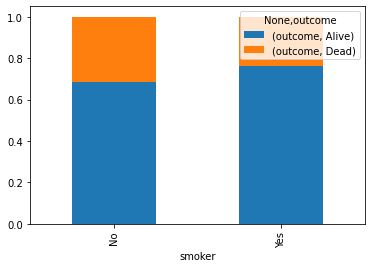

In [45]:
bysmoker.plot(kind = 'bar', stacked = True)

<AxesSubplot:xlabel='agegroup,smoker,outcome'>

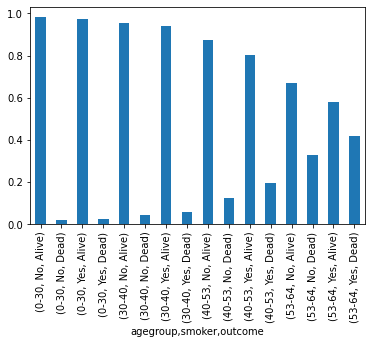

In [47]:
byage.plot(kind = 'bar', stacked = True)

In [50]:
byage2 = byage.unstack().drop('Dead', axis = 1).unstack()
byage2.colums = ['No', 'Yes']
byage.plot(kind = 'bar', sta)

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
